In [1]:
%matplotlib inline
import h5py
import numpy as np
import os
from UG2.utils import data as data_utils
from UG2.config import Config
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import scipy.ndimage as im
import time
from UG2 import main
import json

from UG2.utils import data as data_utils
from UG2.utils import image as image_utils
from UG2.models.srnet import SRNet, feat_ext

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

repo_path = "/home/susho/git/UG2/"
dataset_path = "/data/UG2_data/datasets/BSD100_SR"
data_path = "/data/UG2_data"
test_data_path = data_path + "/h5Files"
results_path = data_path + "results"

In [3]:
config = Config()
config.epochs = 100
config.cuda = True
config.data_parallel = False
config.lr = 0.01
config.img_size = 32
config.batch_size = 1
config.num_workers = 8
config.print_step = 1
config.checkpoint = 1
config.model_path = data_path + "/trainedModels"
config.model_name = "default_model_trained_deblurringFixedSeed.pth"
# config.data_format = "h5"
config.data_path = test_data_path
config.data_format = "h5"
config.hist_eq = True

config.data_file = os.listdir(config.data_path)[0]

In [4]:
with h5py.File(os.path.join(config.data_path, config.data_file), "r") as file:
    data = np.array(file["data"])

In [5]:
output_arr = []
for i in range(data.shape[0]//config.batch_size):
    output_arr.append(main.test_batch(data[i*config.batch_size:(i+1)*config.batch_size], config))

output = np.stack(output_arr, axis = 1)

(1, 2000, 3, 224, 224)


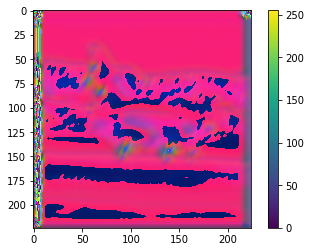

In [6]:
print(output.shape)
plt.figure()
img = (np.transpose(output[0,0], (1,2,0))*255.0).astype(np.uint8)
plt.imshow(img)
plt.colorbar()